# Laboratorul 7

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi

## Exercițiul 1

Realizați graficele din figurile 1 și 2 din îndrumar pentru un semnal sinusoidal cu o frecvență aleasă de voi, _alta_ decât cea utilizată aici.

Reamintim că graficul din dreapta din figura 1 reprezintă înfășurarea semnalului pe cercul unitate, anume reprezentarea în planul complex a șirului $y[n] = x[n] \cdot e^{-2 \pi i n}$.

De asemenea, figura 2 arată influența diferitelor frecvențe de înfășurare asupra formei pe care o are această reprezentare. \
Afișați grafic $z_{\omega} [n] = x[n] \cdot e^{-2 \pi i \omega n}$, pentru **patru valori diferite** ale $\omega$, dintre care una egală cu frecvența semnalului.

In [108]:
def fourier(x, omega = 1):
    N = len(x)
    y = []
    for n in range(N):
        y.append( x[n] * np.exp(2*PI * -1j * omega * n / N) )
    return y

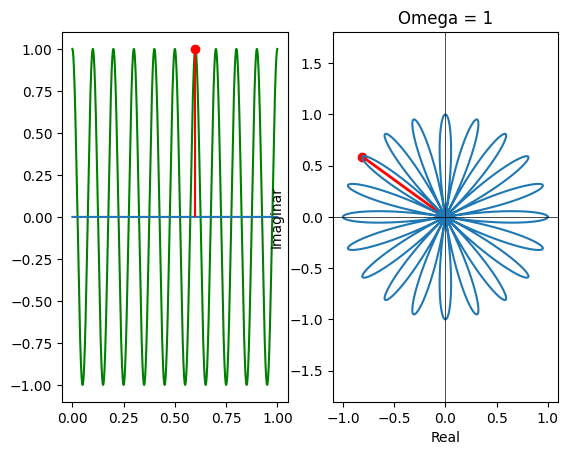

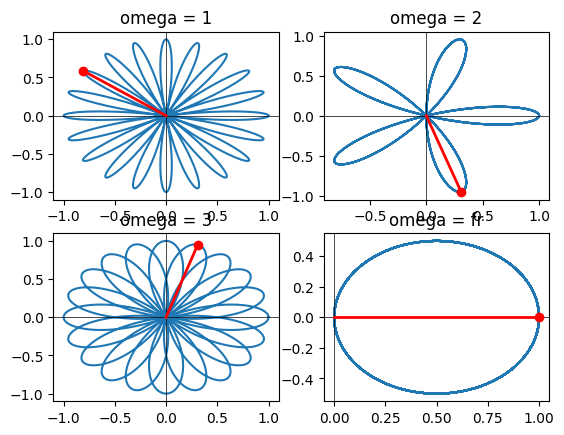

In [167]:
amp = 1
faza = PI/2

start = 0
stop = 1
n = 600/1000

perioada = stop/10
f = 1/perioada # 0.005
fs = f*200

nts = np.arange(start, stop, 1/fs)
x = amp * np.sin(2*PI* nts * f + faza)
y1 = fourier(x, 1)
y2 = fourier(x, 2)
y3 = fourier(x, 3)
y4 = fourier(x, f)

n = int(n*len(nts))
lwidth = 0.5

fig, axs = plt.subplots(1, 2)
axs[0].plot(nts, x, 'g')
axs[0].plot(nts, [0]*len(nts))
axs[0].stem(nts[n], x[n], "r")

re_val = np.real(y1[n])
im_val = np.imag(y1[n])
axs[1].plot([0, re_val], [0, im_val], 'r-', linewidth=2) 
axs[1].plot(re_val, im_val, 'ro')

axs[1].plot(np.real(y1), np.imag(y1))
axs[1].set_title("Omega = 1")
axs[1].set_xlabel("Real")
axs[1].set_ylabel("Imaginar")
axs[1].axis('equal')
axs[1].axhline(0, color='black', linewidth=lwidth)
axs[1].axvline(0, color='black', linewidth=lwidth)


fig, axs = plt.subplots(2,2)
axs[0, 0].plot(np.real(y1), np.imag(y1))
axs[0, 0].axhline(0, color='black', linewidth=lwidth)
axs[0, 0].axvline(0, color='black', linewidth=lwidth)
axs[0, 0].set_title("omega = 1")
re_val = np.real(y1[n])
im_val = np.imag(y1[n])
axs[0, 0].plot([0, re_val], [0, im_val], 'r-', linewidth=2) 
axs[0, 0].plot(re_val, im_val, 'ro')

axs[0, 1].plot(np.real(y2), np.imag(y2))
axs[0, 1].axhline(0, color='black', linewidth=lwidth)
axs[0, 1].axvline(0, color='black', linewidth=lwidth)
axs[0, 1].set_title("omega = 2")
re_val = np.real(y2[n])
im_val = np.imag(y2[n])
axs[0, 1].plot([0, re_val], [0, im_val], 'r-', linewidth=2) 
axs[0, 1].plot(re_val, im_val, 'ro')

axs[1, 0].plot(np.real(y3), np.imag(y3))
axs[1, 0].axhline(0, color='black', linewidth=lwidth)
axs[1, 0].axvline(0, color='black', linewidth=lwidth)
axs[1, 0].set_title("omega = 3")
re_val = np.real(y3[n])
im_val = np.imag(y3[n])
axs[1, 0].plot([0, re_val], [0, im_val], 'r-', linewidth=2) 
axs[1, 0].plot(re_val, im_val, 'ro')

axs[1, 1].plot(np.real(y4), np.imag(y4))
axs[1, 1].axhline(0, color='black', linewidth=lwidth)
axs[1, 1].axvline(0, color='black', linewidth=lwidth)
axs[1, 1].set_title("omega = fr")
re_val = np.real(y4[n])
im_val = np.imag(y4[n])
axs[1, 1].plot([0, re_val], [0, im_val], 'r-', linewidth=2) 
axs[1, 1].plot(re_val, im_val, 'ro')


## Exercițiul 2

Afișați **modulul** (valoarea absolută) a transformatei Fourier (folosind relația 1 din PDF) pentru un semnal compus de voi, având **cel puțin trei componente de frecvență distincte** (obțineți un grafic asemănător figurii 3).

Ajustați frecvențele de înfășurare $\omega$ utilizate în transformata Fourier în funcție de frecvența caracteristică a sinusoidei.

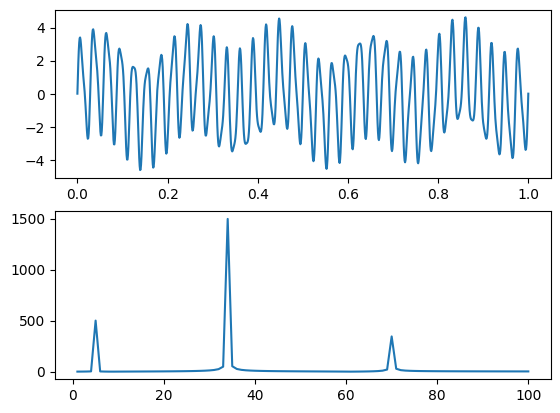

In [175]:
frec = [5, 34, 70]
amps = [1, 3, 0.7]

fs = 1000 #Hz

nts = np.linspace(0, 1, fs)
omegas = np.linspace(1, 100, 100)

sins = []
for i in range(len(frec)):
    sins.append( amps[i] * np.sin(2*PI* nts * frec[i]) )

sin = sum(sins)

omega_comp = []
for i in omegas:
    omega_comp.append( abs(sum(fourier(sin, i))) )

fig, axs = plt.subplots(2)
axs[0].plot(nts, sin)
axs[1].plot(omegas, omega_comp)
